##### Import required modules and functions

In [16]:
import numpy as np
import matplotlib.pyplot as mpl
import seaborn as sb
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.metrics import confusion_matrix

##### Load the MNIST digits dataset

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()  # separate into training and testing sets

##### Visualisation of example images

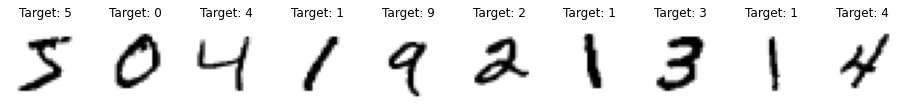

In [3]:
# visualise some representative sample images, labelled according to their target output
_, axes = mpl.subplots(nrows=1, ncols=10, figsize=(16, 3))
for ax, image, label in zip(axes, x_train, y_train): # construct tuples of plot axes, image data, and target data
    ax.set_axis_off()  # remove axes of each subplot
    ax.imshow(image, cmap=mpl.cm.gray_r) # applies an inverse (_r) greyscale colour-map to each image (equivalent to 'binary' cmap)
    ax.set_title(f'Target: {label}')

##### Normalise/rescale the image array data to the interval [0,1]

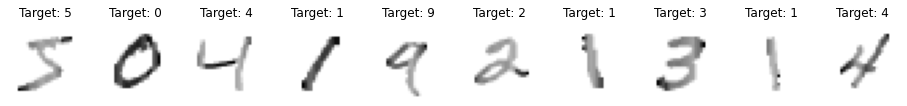

In [4]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

# visualise the normalised images
_, axes = mpl.subplots(nrows=1, ncols=10, figsize=(16,3))
for ax, image, label in zip(axes, x_train, y_train):
    ax.set_axis_off()
    ax.imshow(image, cmap=mpl.cm.gray_r)
    ax.set_title(f'Target: {label}')

##### Construct a simple feedforward neural network

In [20]:
net = Sequential()
net.add(tf.keras.layers.Flatten()) # input layer flattens the 28x28 image data
net.add(tf.keras.layers.Dense(112, activation=tf.nn.relu)) # dense layer of 112 neurons added to network, with ReLU activation function
net.add(tf.keras.layers.Dense(112, activation=tf.nn.relu))
net.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) # final layer, classifier outputting softmax 'probabilities'

##### Compile the network, then train using the training data

In [23]:
net.compile(
optimizer = 'SGD', # employ stochastic gradient descent to optimise weights and biases
loss = 'sparse_categorical_crossentropy', # cross-entropy loss function
metrics = ['accuracy'] # track the classification accuracy while training
)

In [24]:
net.fit(x_train, y_train, epochs=3) # train the neural network on the training data

Epoch 1/3
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0429 - accuracy: 0.9879
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0371 - accuracy: 0.9899
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0349 - accuracy: 0.9905


##### Use the trained network to make classification predictions for the testing data

In [25]:
pred = net.predict(x_test) # feed the testing data through the network

xt_list = x_test.tolist() # convert the numpy array of test images to a list
pred_dig = [np.argmax(pred[i]) for i in range(len(pred))] # generate a list of digit predictions for the test images

In [26]:
test_loss, test_acc = net.evaluate(x_test, y_test) # return classification accuracy of the network for the testing data

313/313 [==============================] - 2s 3ms/step - loss: 0.0800 - accuracy: 0.9762


##### Visualisation of example test images with network predictions

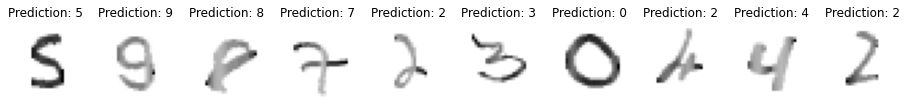

In [50]:
_, axes = mpl.subplots(nrows=1, ncols=10, figsize=(16,3))
i = 240  # display the i-th image to the (i + ncols)-th image, with corresponding network predictions
for ax, image, label in zip(axes, xt_list[i:], pred_dig[i:]):
    ax.set_axis_off()
    ax.imshow(image, cmap=mpl.cm.gray_r)
    ax.set_title(f'Prediction: {label}')

##### Visualise the network's classification accuracy

Text(69.0, 0.5, 'Predicted')

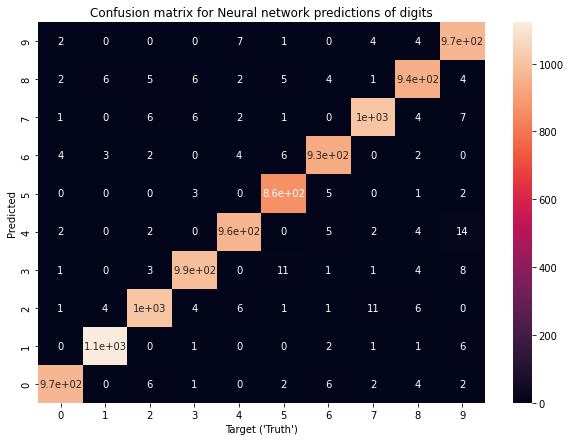

In [29]:
# generate a heatmap representation of the NN confusion matrix
mpl.figure(figsize=(10,7))
hm = sb.heatmap(np.transpose(confusion_matrix(y_test, pred_dig) ), annot=True)
hm.invert_yaxis()
mpl.title('Confusion matrix for Neural network predictions of digits')
mpl.xlabel('Target (\'Truth\')')
mpl.ylabel('Predicted')